In [2]:
import pandas as pd
import sqlite3 as sq

## connection

In [3]:
db =  sq.connect('../data/checking-logs.sqlite.sqlite')

## query

In [4]:
query = 'SELECT timestamp FROM checker WHERE uid LIKE "user_%";'
df = pd.io.sql.read_sql(query, db, parse_dates=['timestamp'])

In [5]:
df['date'] = df.timestamp.dt.floor('d')
df['hour'] = df.timestamp.dt.hour
dw = []
for i in range(len(df)):
    dw.append(df['date'][i].dayofweek)
df['dayofweek'] = dw

In [149]:
df1 = df[df['dayofweek'] >= 5].groupby('hour').date.value_counts().unstack(0).fillna(0).mean()
df2 = df[df['dayofweek'] < 5].groupby('hour').date.value_counts().unstack(0).fillna(0).mean()

In [6]:
new = pd.concat([df1, df2], axis = 1).rename(columns={0: 'weekend', 1: 'working_day'} )

NameError: name 'df1' is not defined

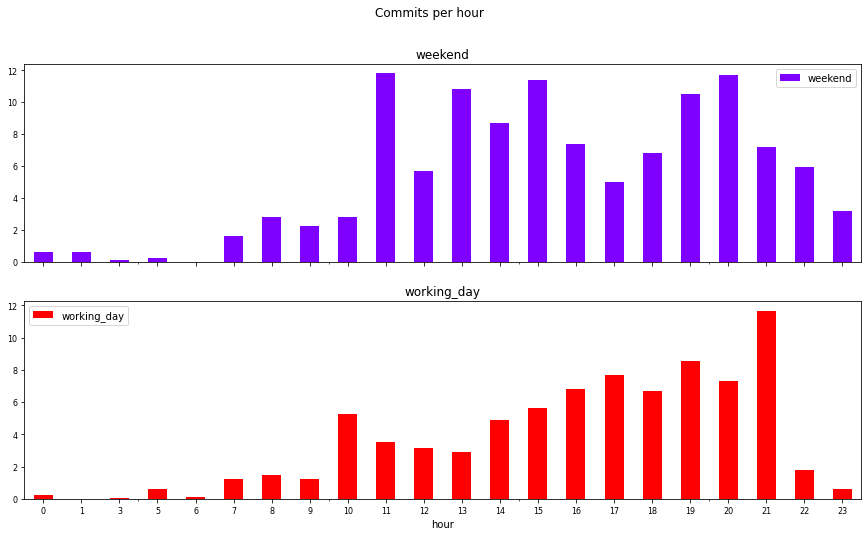

In [151]:
graph = new.plot.bar(colormap='rainbow', subplots=True, fontsize = 8, xlabel = 'hour', figsize = (15, 8), title = "Commits per hour", rot = 0)


In [152]:
db.close()

##  “Is the dynamic different on working days and weekends?” - YES
## The number of commits is the largest during working days - 21. 
## The hour when it is the largest during the weekend - 11